In [1]:
import logging
import sys

from src.simulator.factory import Factory


logging.basicConfig(
     filename='run.log',
     filemode='w',
     level=logging.INFO,
     format='%(asctime)s - %(name)s - %(levelname)-7s - %(message)s',
     datefmt='%H:%M:%S'
 )
logger = logging.getLogger(__name__)


logger.info('Starting simulation')
factory = Factory.from_config('config/factory.yml')
factory.run(366)
# factory.plot()

In [2]:
# Save as csv.gz
import shutil
import arrow
import pandas as pd

ts = arrow.now('Europe/Helsinki').strftime("%Y%m%d-%H%M%S")
shutil.copy('config/factory.yml', f'results/factory-{ts}.yml')
df = pd.read_csv('results/run.csv')
print(df.columns.tolist())
df.to_csv(f'results/run-{ts}.csv.gz', compression='gzip', index=False)

['Factory.Datetime', 'Machine.State', 'Machine.ProductionInterruptCode', 'Machine.ErrorCode', 'Machine.Program', 'Machine.Temperature', 'Machine.IsPlannedOperatingTime', 'Machine.Consumable.Consumption', 'Machine.Material.Consumption', 'Machine.Material.MaterialId', 'Machine.Material.MaterialIdString', 'Product1.SuccessQuantity', 'Product1.FailedQuantity', 'Product2.SuccessQuantity', 'Product2.FailedQuantity', 'Product3.SuccessQuantity', 'Product3.FailedQuantity', 'ConsumableContainer.Quantity', 'MaterialContainer.Quantity']


In [3]:
(
    df
    .set_index('Factory.Datetime')
    ['Machine.ErrorCode']
    .value_counts(True)
)

0      0.963049
103    0.027775
102    0.003231
203    0.001922
204    0.001778
202    0.001721
201    0.000524
Name: Machine.ErrorCode, dtype: float64

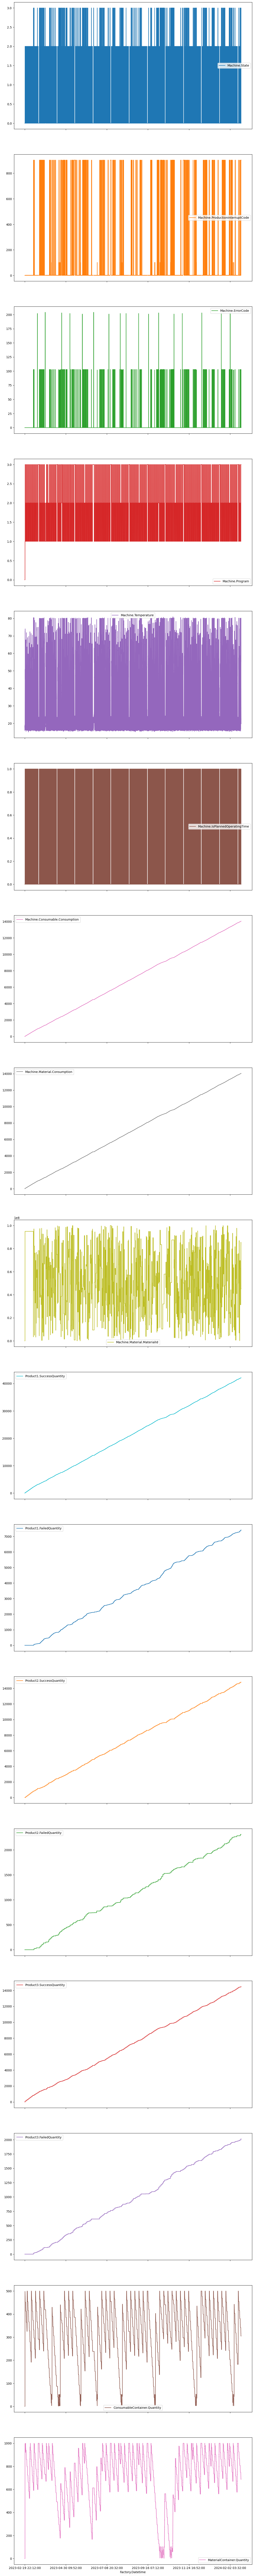

In [4]:
(
    df
    .set_index('Factory.Datetime')
    .select_dtypes('number')
    # [['Machine.ErrorCode']]
    .plot(subplots=True, figsize=(14, 8 * len(df.columns)))
);

In [ ]:
# TODO: Refactor / cleanup all
# TODO: Sensor based alarms/events
# TODO: Locking mechanism when putting stuff

Missing:
- Planned maintenance X
- Material / batch ids (materiaali-id voi olla string) X
- Collectng events (debug / info / warning / error) --> logs not for now, separate variable when necessary, error/stop code most critical for now (integer) --> exact variables in Excel
- Mappings from string states into integers / boolean X
- Randomization of fails - "global fail proba based on last maintenance"
- Integration: Pull/push? Taking snapshots of the machine state vs. pushing e.g. error X
- Cumulative: Consumable X
- Program: add part counter X / target / postprocessing step that identifies failed  
- Randomization of time X
- Running in AWS / Noux environments / CSV

2023 csv:t, jatketaan kumulatiivisia
